# Define Paths 

In [1]:
DQDatasetPath = "datasets"
DQSrc = f"{DQDatasetPath}/Source"
DQSucc = f"{DQDatasetPath}/Success"
DQRej = f"{DQDatasetPath}/Rejects"
DQBible=  f"{DQDatasetPath}/Bible"
AuditLogs = f"{DQDatasetPath}/AuditLogs"
DQLogs = f"{DQDatasetPath}/DQLogs"

# Import Dependencies

In [2]:
import findspark
findspark.init()
import pyspark # only run after findspark.init()
from pyspark.sql.functions import *
from pyspark.sql.functions import col, explode,coalesce,udf,pandas_udf
from pyspark.sql import SparkSession
from pyspark.sql.types import LongType,StructType,StringType,ArrayType
spark = SparkSession.builder.getOrCreate()
import datetime
from datetime import timedelta 
from pyspark.sql.functions import split
from pyspark.sql import functions
from pyspark.sql.window import *
import pandas as pd
import json

In [3]:
import seaborn as sns,numpy as np
from matplotlib import pyplot as plt


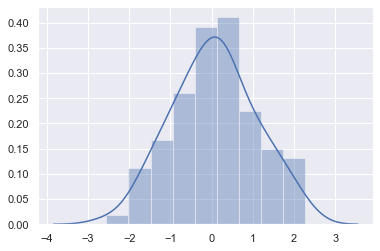

In [4]:
import seaborn as sns,numpy as np
sns.set();np.random.seed(0)
x = np.random.randn(100)
ax = sns.distplot(x)

# Read DQ Logs

In [5]:
dqlogs_df = spark.read.format("csv").option("header",True).load(f"{DQLogs}")
dqlogs_df_pd = dqlogs_df.toPandas()
dqlogs_df_pd

,id,CATEGORY_RULEID,PRIORITY,DESCRIPTION,OUTPUT_COL
0,51,SOFT_R001,1,Trims Employee IP address and Soft Fail Record...,ip_address
1,51,HARD_R002,2,Trims Emp Join Date and Reject/Hard Fail in ca...,emp_join_date
2,51,SOFT_R003,3,Trims Employee Gender and Soft Fail record in ...,gender
3,51,HARD_R004,4,Trims Employee Mail and Rejects/Hard Fail reco...,email
4,52,SOFT_R001,1,Trims Employee IP address and Soft Fail Record...,ip_address
...,...,...,...,...,...
79,96,HARD_R002,2,Trims Emp Join Date and Reject/Hard Fail in ca...,emp_join_date
80,96,HARD_R004,4,Trims Employee Mail and Rejects/Hard Fail reco...,email
81,97,SOFT_R003,3,Trims Employee Gender and Soft Fail record in ...,gender
82,98,HARD_R004,4,Trims Employee Mail and Rejects/Hard Fail reco...,email


# Get DF for failures per Record 

In [6]:
# Failure per record
fail_per_rec = dqlogs_df.groupby("id").agg(count("*").alias("FailCount"))
fail_per_rec_pd = fail_per_rec.toPandas()
fail_per_rec_pd

,id,FailCount
0,51,4
1,54,4
2,69,1
3,73,2
4,87,1
5,64,1
6,59,2
7,85,1
8,52,4
9,71,2


# No. of Records for each failure

In [7]:
error_per_rule = dqlogs_df.groupby("category_ruleid").agg(count("*").alias("ErrorCount"))
error_per_rule_pd = error_per_rule.toPandas()
error_per_rule_pd

,category_ruleid,ErrorCount
0,SOFT_R001,16
1,SOFT_R003,24
2,HARD_R002,21
3,HARD_R004,23


# Plot Results

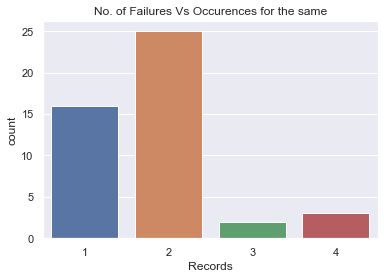

In [8]:
# Plot number of Failures vs Records
sns.countplot(x='FailCount',data=fail_per_rec_pd)
plt.xlabel("No. of Failures")
plt.xlabel("Records")
plt.title("No. of Failures Vs Occurences for the same")
plt.show()

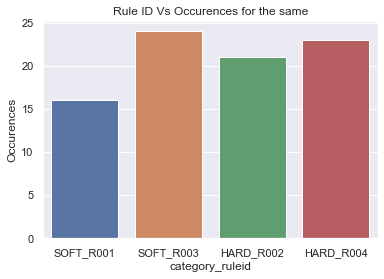

In [9]:
# Plot Error Count Distribution Chart
sns.barplot(x='category_ruleid',y="ErrorCount",data=error_per_rule_pd)
plt.ylabel("Occurences")
plt.title("Rule ID Vs Occurences for the same")
plt.show()